In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import periodogram
from math import ceil

In [6]:
# msg = np.random.randint(low=0, high=2, size=int(1e6))
msg = "100001111010001101111110001111010111100001"
# BPSK parameters
Eb = 0.001
fs = 10000
Tb = 0.001
br=1/Tb;                 # bit rate
fc1=br;                 #carrier frequency for information as 1
fc2=ceil(fc1 + 1/Tb)                  #carrier frequency for information as 0

In [7]:
t = np.linspace(0, Tb, int(Tb*fs),endpoint=False)
s = np.sqrt(2/Tb)*np.cos(2*np.pi*fc1*t)
s1=np.sqrt(2/Tb)*np.cos(2*np.pi*fc2*t)
orthocheck=s1.dot(s)

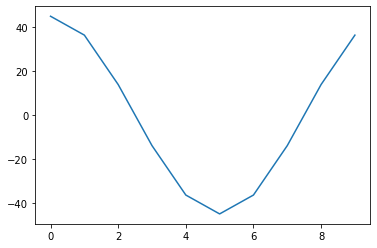

In [8]:
plt.plot(s)

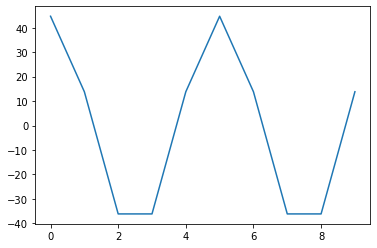

In [9]:
plt.plot(s1)

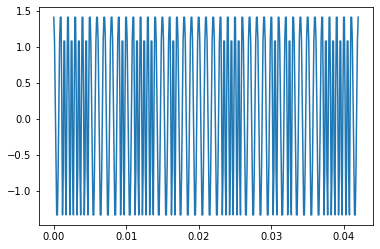

In [10]:
# FSK Transmitter
signal = []
t = np.linspace(0, Tb, int(Tb*fs))
for i in msg:
    s = np.sqrt(2*Eb/Tb)*np.cos(2*np.pi*fc1*t)
    s1=np.sqrt(2*Eb/Tb)*np.cos(2*np.pi*fc2*t)
    if i == "0":
        s = s1
    signal.extend(s)
t = np.linspace(0, len(msg)*Tb, int(len(msg)*Tb*fs))

fig, ax = plt.subplots()
ax.plot(t, signal)

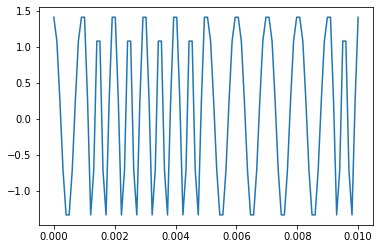

In [16]:
plt.plot(tplt,signal[:len(tplt)])

0.39065981468795985
The Fs is  [0.         0.02380952 0.04761905 0.07142857 0.0952381  0.11904762
 0.14285714 0.16666667 0.19047619 0.21428571 0.23809524 0.26190476
 0.28571429 0.30952381 0.33333333 0.35714286 0.38095238 0.4047619
 0.42857143 0.45238095 0.47619048 0.5        0.52380952 0.54761905
 0.57142857 0.5952381  0.61904762 0.64285714 0.66666667 0.69047619
 0.71428571 0.73809524 0.76190476 0.78571429 0.80952381 0.83333333
 0.85714286 0.88095238 0.9047619  0.92857143 0.95238095 0.97619048
 1.         1.02380952 1.04761905 1.07142857 1.0952381  1.11904762
 1.14285714 1.16666667 1.19047619 1.21428571 1.23809524 1.26190476
 1.28571429 1.30952381 1.33333333 1.35714286 1.38095238 1.4047619
 1.42857143 1.45238095 1.47619048 1.5        1.52380952 1.54761905
 1.57142857 1.5952381  1.61904762 1.64285714 1.66666667 1.69047619
 1.71428571 1.73809524 1.76190476 1.78571429 1.80952381 1.83333333
 1.85714286 1.88095238 1.9047619  1.92857143 1.95238095 1.97619048
 2.         2.02380952 2.04761905

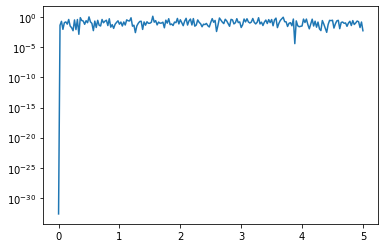

In [42]:
ns = len(signal)
noise = np.random.normal(size=ns)
fs=10
f, psd = periodogram(noise, fs)

#fig, ax = plt.subplots(2,1)
#ax[0].plot(noise)
#ax[1].plot(f, psd)

psd_av = np.mean(psd)
N0 = 2*psd_av
signalwnoise= signal+noise
print(N0)
print("The Fs is ",f)
print("The noise data is ",noise)
#print("The psd is ")
plt.semilogy(f, psd)
#plt.semilogy(noise)


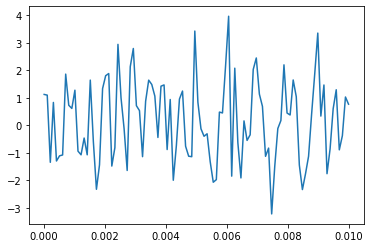

In [15]:
tplt2 = np.linspace(0, 10*Tb, int(10*Tb*fs))
tplt = np.linspace(0, 10*Tb, int(10*Tb*fs))
plt.plot(tplt,signalwnoise[:len(tplt2)])

In [17]:
# Non coherent fsk detector
t = np.linspace(0, Tb, int(Tb*fs))
Ts=int(Tb*fs) # no of samples of carrier for 1 bit
e1=np.cos(2*np.pi*fc1*t) #cosomega1t
e3=np.cos(2*np.pi*fc2*t) #cosomega2t
decmsg=[]
for x in range(int(len(signalwnoise)/Ts)):
    samplearr=signalwnoise[x*Ts:(x+1)*Ts]
    e5=(samplearr*e1).sum()/len(samplearr)
    e7=(samplearr*e3).sum()/len(samplearr)
    if e5<e7:
        decmsg.append('0')
    else:
        decmsg.append('1')

In [19]:
recv_msg=''.join(decmsg)
recv_msg

'100001111010001101011110001111010111100001'